## Table of Contents
* [1. Introduction](#chapter1)
    * [1.1 Description](#section1_1)
    * [1.2 Main aims](#section1_2)
    * [1.3 Data description](#section1_3)
* [2. Preparation](#chapter2)
    * [2.1 Importing libs](#section2_1)
    * [2.2 Data import, research and preparation](#section2_2) 
* [3. Exploratory data analysis](#chapter3)
    * [3.1 Defining the largest platforms for analysis](#section3_1)
    * [3.2 Defining the active platforms for analysis](#section3_2)
    * [3.3 Analysis of active platforms](#section3_3)
    * [3.4 Exploring the dependency between scores and sales on active platforms](#section3_4)    
* [4. User profile](#chapter4)
    * [4.1 The most popular platforms by regions](#section4_1)
    * [4.2 The most popular genres by regions](#section4_2)
    * [4.3 Influence of ratings on sales](#section4_3)
* [5. Hypothesis testing](#chapter5)
    * [Hypothesis 1: Average user scores between Xbox One and PC are equal](#section5_1)
    * [Hypothesis 2: Average user scores of genres Action and Sports are equal.](#section5_2)
* [6. Results](#chapter6)    

# 1. Introduction <a class="anchor" id="chapter1"></a>

### 1.1 Description <a class="anchor" id="section1_1"></a>

At our disposal is the dataset of video game sales till 2016 and their attributes like genre, rating, platform etc.

### 1.2 Main aims: <a class="anchor" id="section1_2"></a>

1. We need to define main characteristics which mostly influence the success of video games in sales.
2. Prepare the foundation of the 2017 marketing campaign.

### 1.3 Data description <a class="anchor" id="section1_3"></a>

- `Name` — name of the video game
- `Platform` — platform of the video game
- `Year_of_Release` — year of release
- `Genre` — video game genre
- `NA_sales` — sales in North America (millions copies)
- `EU_sales` — sales in Europe (millions copies)
- `JP_sales` — sales in Japan (millions copies)
- `Other_sales` — sales in other countries (millions copies)
- `Critic_Score` — critic score (max 100)
- `User_Score` — user score (max 10)
- `Rating` — ESRB game rating (Entertainment Software Rating Board). 

ESRB ratings provide information about what’s in a game or app so parents and consumers can make informed choices about which games are right for their family.

Data for 2016 might be incomplete.

# 2. Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Importing libs <a class="anchor" id="section2_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

### 2.2 Data import, research and preparation <a class="anchor" id="section2_2"></a>

In [2]:
url = 'https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/2.%20Gaming_industry_analysis/datasets/games.csv'
df = pd.read_csv(url)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Exploring info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Checking if there are any explicit duplicates
df.duplicated().sum()

0

In [5]:
# Checking the unique platform names to find if there are inexplicit duplicates
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
# Checking the unique genre names to find if there are inexplicit duplicates
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

**Brief conclusions:** there are no explicit nor inexplicit duplicates

In [7]:
# Changing column names to lower case 
df = df.rename(columns={'Name': 'name'
                        ,'Platform': 'platform'
                        ,'Year_of_Release': 'year_of_release'
                        ,'Genre': 'genre'
                        ,'NA_sales': 'na_sales'
                        ,'EU_sales': 'eu_sales'
                        ,'JP_sales': 'jp_sales'
                        ,'Other_sales': 'other_sales'
                        ,'Critic_Score': 'critic_score'
                        ,'User_Score': 'user_score'
                        ,'Rating': 'rating'
                       }
              )

In [8]:
# Checking the share of empty values in columns
cols = ['year_of_release','critic_score','user_score','rating']

for c in cols:
    print('Share of empty values in column',c, len(df[df[c].isna() == True])/len(df))

Share of empty values in column year_of_release 0.01609332934489979
Share of empty values in column critic_score 0.5131917439425665
Share of empty values in column user_score 0.4008973975471134
Share of empty values in column rating 0.4047861202512713


#### Brief conclusions:
* year_of_release - deleting empty rows;
* critic_score - filter for the further analysis;
* user_score - changing tbd to NaN and filter for the further analysis;
* rating - changing empty values to 'undefined' and filter for the further analysis.

In [9]:
# Clearing rows without year attribute as insufficient share of the dataset
empty_years = df.query('year_of_release.isnull()', engine = 'python')

df = df.drop(empty_years.index)

In [10]:
# Changing tbd to NaN as it better represents the nature
df['user_score'] = df['user_score'].replace('tbd',np.NaN)

In [11]:
# Setting ratings with nan as undefined for better presentation
df['rating'] = df['rating'].fillna('undefined')
df['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [12]:
# Changing datatypes in accordance with their nature
df = df.astype({'year_of_release': 'int16' 
                        ,'na_sales': 'float64'
                        ,'eu_sales': 'float64'
                        ,'jp_sales': 'float64'
                        ,'other_sales': 'float64'
                        ,'critic_score': 'float16'
                        ,'user_score': 'float16'
                       }
              )

In [13]:
# Checking empty values in 'games' column
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,undefined
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,undefined


In [14]:
# Two games have no important attributes and should be excluded

no_name_games = df.query('name.isnull()', engine='python')
df = df.drop(no_name_games.index)

In [15]:
# Grouping ESRB ratings in age restriction order from adults to amature. 
# Combining 'K-A' rating with 'E' as obsolete rating name   
def rating_map(row):
    if row['rating'] == 'EC':
        return 1
    elif row['rating'] == 'E' or row['rating'] == 'K-A':
        return 2
    elif row['rating'] == 'E10+':
        return 3
    elif row['rating'] == 'T':
        return 4
    elif row['rating'] == 'M':
        return 5
    elif row['rating'] == 'AO':
        return 6
    elif row['rating'] == 'RP':
        return 7    
    elif row['rating'] == 'undefined':
        return 8    

In [16]:
df['label'] = df.apply(rating_map, axis = 1)

In [17]:
# Calculating total sales in all regions

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# 3. Exploratory data analysis <a class="anchor" id="chapter3"></a>

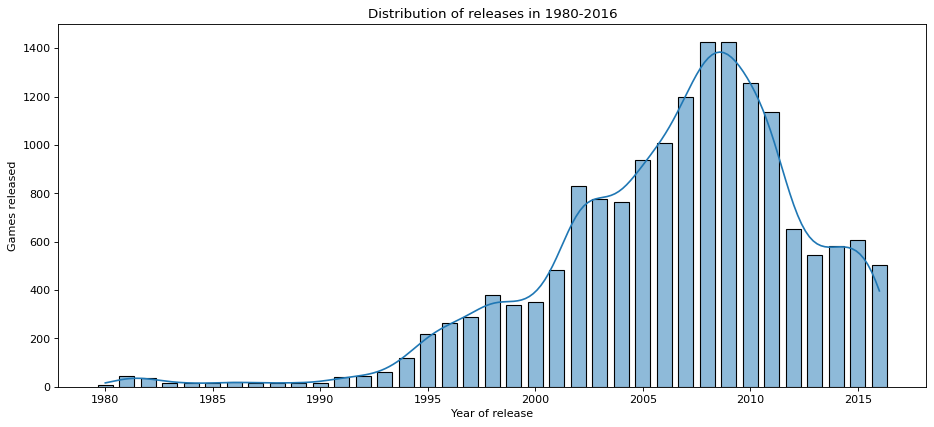

In [18]:
# Explorting the distribution of releases
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

ax = sns.histplot(df,
             x='year_of_release',
             discrete=True,
             shrink=0.7,
             legend = None,
             kde = True
             )

plt.xlabel('Year of release')
plt.ylabel('Games released')
plt.title('Distribution of releases in 1980-2016')
plt.show()

**Important data observatiions:**
* Negatively skewed distribution. Explaned by the development of gaming industry. Changes can lead to incomparability of games in different time periods;
* Concentration of releases in 2006-2011;
* Significant period can be set as starting from 1995.

### 3.1 Defining the largest platforms for analysis <a class="anchor" id="section3_1"></a>

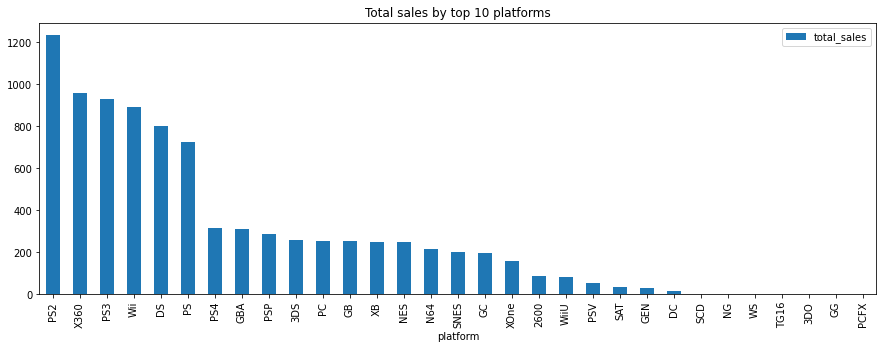

In [19]:
# Making subsets with total sales for each platform
top_platforms = df.groupby(['platform'])['total_sales'].agg('sum').reset_index()
top_platforms = top_platforms.sort_values(by='total_sales',ascending=False).reset_index(drop=True)

# Taking top 10 platforms
top_platforms.plot.bar(x = 'platform',y='total_sales', figsize = (15,5))
plt.title('Total sales by top 10 platforms')
plt.show()

In [20]:
# 6 platforms stand out among others
top_pm = top_platforms.head(6)
top_pm_filter = top_pm['platform']

In [21]:
# Making subsets with top platforms
top_pm_sales = df.query('platform in @top_pm_filter')
top_pm_sales = top_pm_sales.groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()

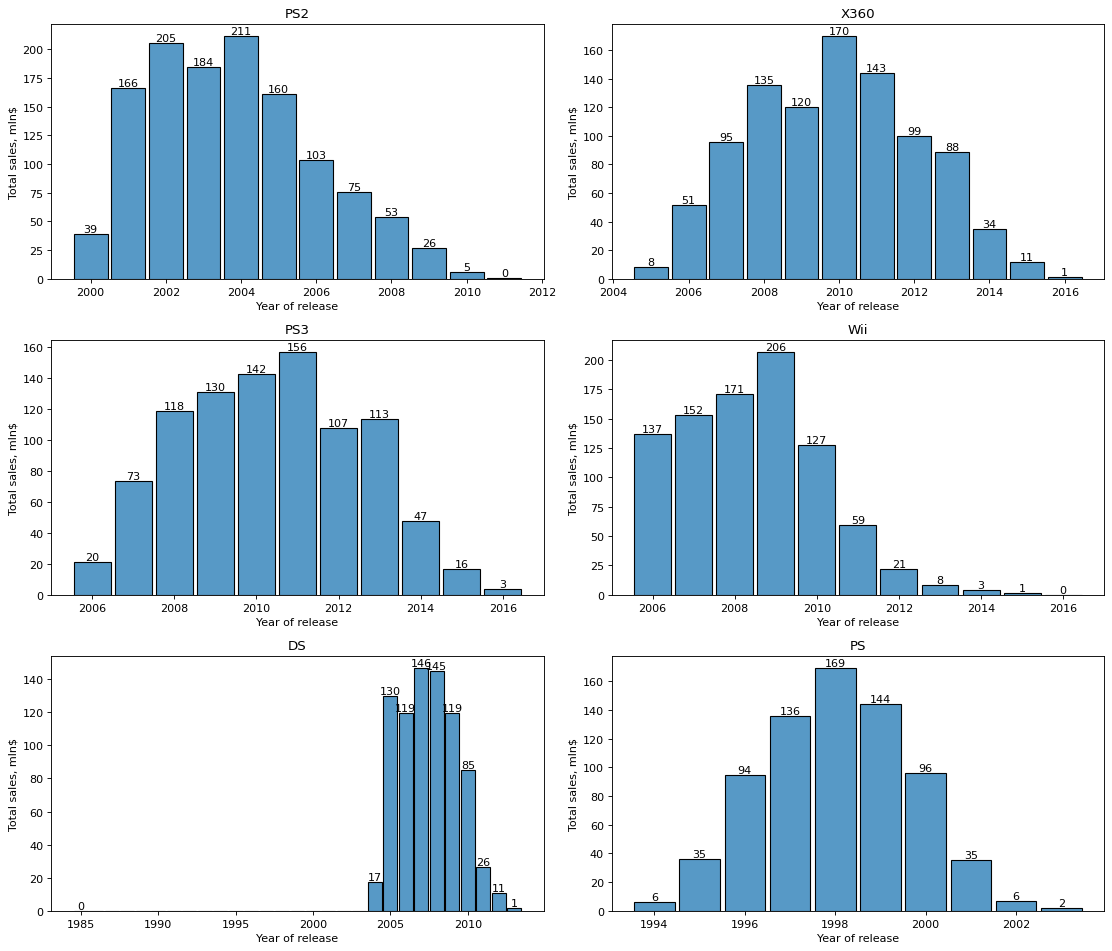

In [22]:
# Exploring total sales of each top platform
fig,axl = plt.subplots(figsize=(14, 12), dpi = 80)

for i, pm in enumerate(top_pm_filter):
    
    df_sub = top_pm_sales.query('platform == @pm')
    
    ax = sns.histplot(df_sub,
             x='year_of_release',
             weights = 'total_sales',
             discrete=True,
             multiple='stack',
             shrink=0.9,
             bins = len(df_sub['year_of_release'].unique()),
             ax = plt.subplot(3, 2, i + 1),
             legend = None                    
             )
    
    plt.title(pm)
    ax.set(xlabel='Year of release',ylabel='Total sales, mln$')
    for c in ax.containers:
        labels = []
        for val in c.datavalues:
            if np.isnan(val) or val == 0:
                labels.append('')
            else:
                labels.append(f'{int(val)}')
        ax.bar_label(c, labels=labels, fontsize=10)
        
plt.tight_layout()       
plt.show()    

**Brief conclusion:** Judging by sales across gaming platforms, the lifecycle of a platform is about 7-8 years. At the same time, the PC platform is a long-liver. We will choose as current platforms those that have had sales in the last 3 years (2014-2016).

### 3.2 Defining the active platforms for analysis <a class="anchor" id="section3_2"></a>

In [23]:
# Taking 3 last years from the dataset
L3Y = [2014,2015,2016]
active_platforms_check = df.groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()
active_platforms_check = active_platforms_check.query('year_of_release in @L3Y')
active_pm = active_platforms_check['platform'].unique()

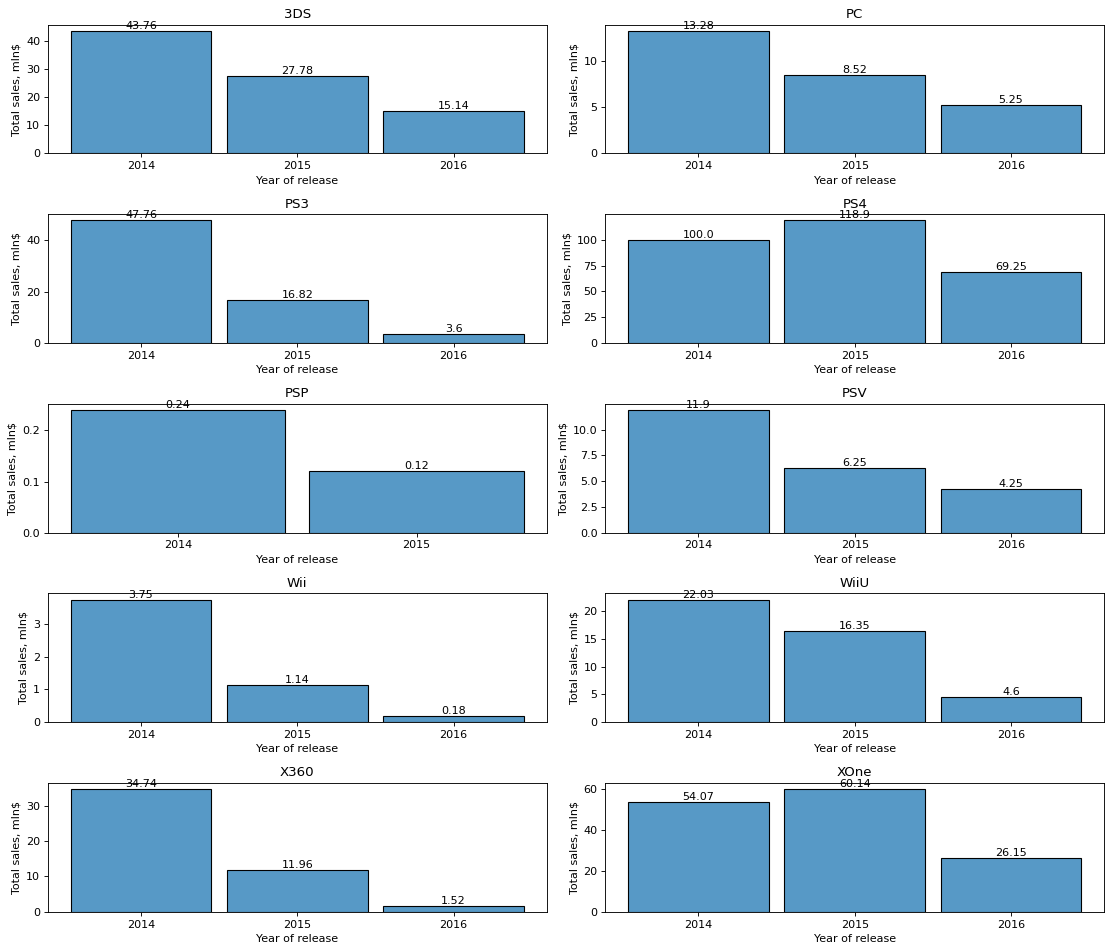

In [24]:
# Exploring total sales of each top platform
fig,axl = plt.subplots(figsize=(14, 12), dpi = 80)

for i, pm in enumerate(active_pm):
    
    df_sub = active_platforms_check.query('platform == @pm')
    df_sub['year_of_release'] = df_sub['year_of_release'].astype(str)
    
    ax = sns.histplot(df_sub,
             x='year_of_release',
             weights = 'total_sales',
             discrete=True,
             multiple='stack',
             shrink=0.9,
             bins = 3,
             ax = plt.subplot(5, 2, i + 1),
             legend = None                    
             )
    
    plt.title(pm)
    ax.set(xlabel='Year of release',ylabel='Total sales, mln$')
    for c in ax.containers:
        labels = []
        for val in c.datavalues:
            if np.isnan(val) or val == 0:
                labels.append('')
            else:
                labels.append(f'{round(val,2)}')
        ax.bar_label(c, labels=labels, fontsize=10)
plt.tight_layout()       
plt.show()    

**Brief conclusion on platform sales:**
* Wii, PSP  are outdated platforms which will likely have insignificant sales in 2017.
* X360, PS3, PSV и WiiU have a declining trend as aging platforms and are likely to have low sales in 2016 and 2017.
* 3DS, PS4 и XOne are platforms that provide a significant portion of sales and potentially will continue to sell well in the future.
* PC is a stable platform with a relatively small sales volume.

### 3.3 Analysis of active platforms <a class="anchor" id="section3_3"></a>

In [25]:
# Setting the list of active platforms
active_platforms_list = ['3DS','PC','PS3','PS4','PSV','WiiU','X360','XOne']
active_platforms = df.query('platform in @active_platforms_list & year_of_release >= 2014')

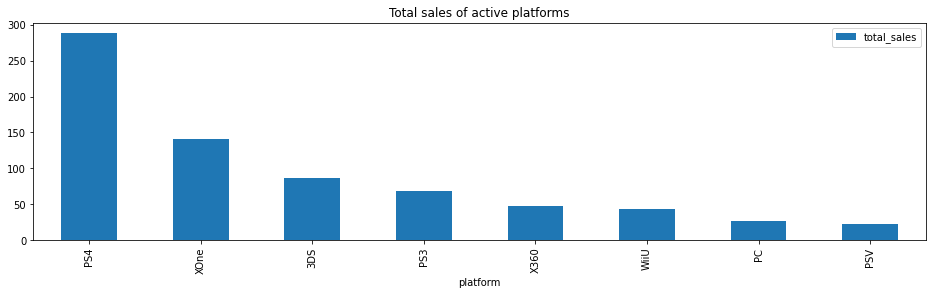

In [26]:
active_platforms.groupby(['platform'])['total_sales'].agg('sum').reset_index().sort_values(by='total_sales',ascending=False).reset_index(drop=True).plot.bar(x = 'platform',y='total_sales', figsize = (16,4))
plt.title('Total sales of active platforms')
plt.show()

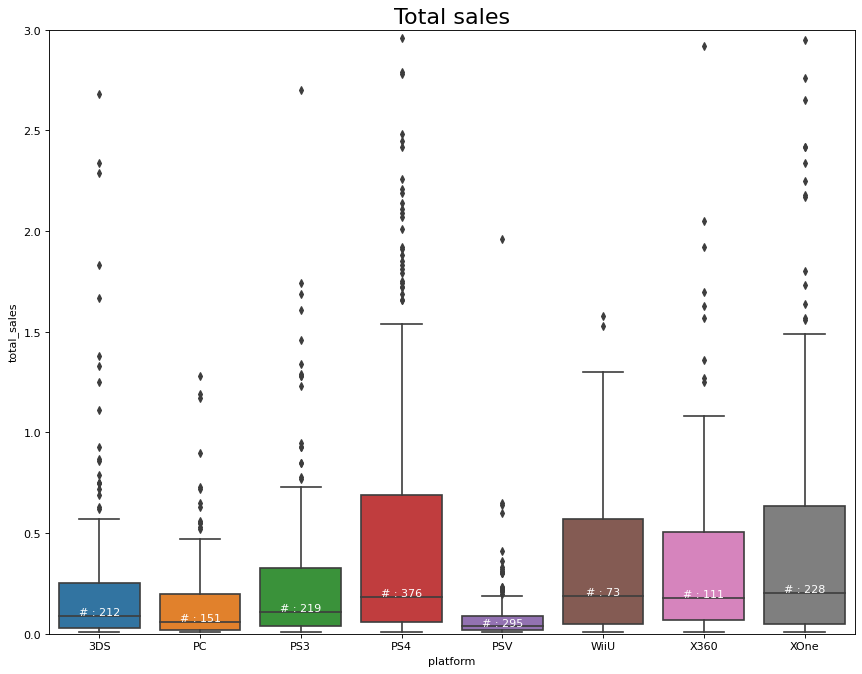

In [27]:
# Exploring the density of sales below 3 mln 
active_platforms = active_platforms.sort_values(by='platform')
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=active_platforms, notch=False)

def add_n_obs(active_platforms,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in active_platforms.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = active_platforms.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "# : "+str(n_ob), horizontalalignment='center', fontdict={'size':10}, color='white')

add_n_obs(active_platforms,group_col='platform',y='total_sales')    

# Decoration
plt.title('Total sales', fontsize=20)
plt.ylim(0, 3)
plt.show()

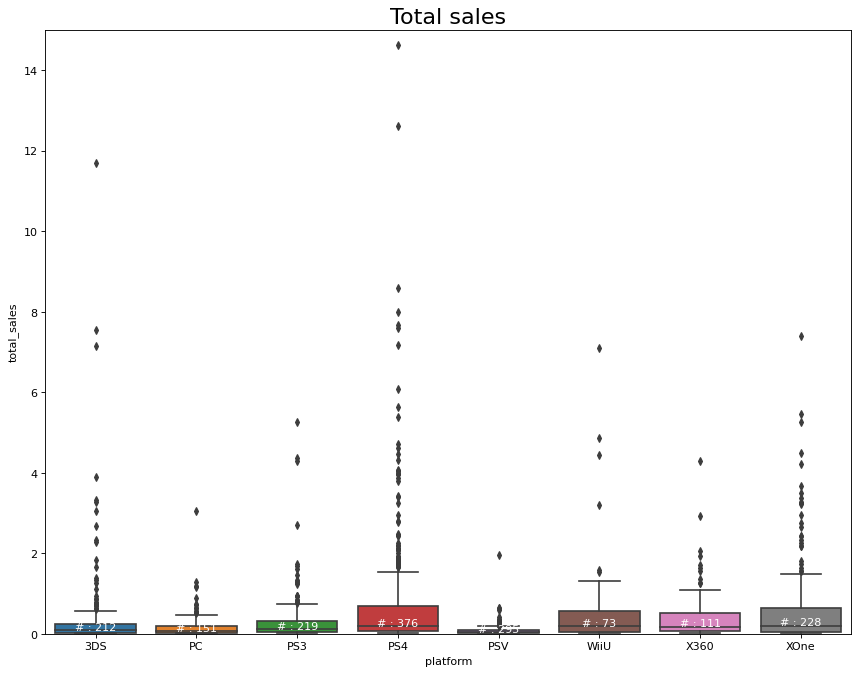

In [28]:
# Exploring overall density
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=active_platforms, notch=False)

add_n_obs(active_platforms,group_col='platform',y='total_sales')    

# Decoration
plt.title('Total sales', fontsize=20)
plt.ylim(0, 15)
plt.show()

#### Brief conclusion on sales:
* On average, the best-selling game titles are on the X360 and XOne platforms, although the PlayStation platforms have the highest sales volume. It is worth noting that the previous generation of Xbox platforms has held up better in recent years than Sony's competitor;
* Sales of titles on all platforms have a wide range, meaning that the sample includes both AAA projects and games from small studios, which usually have small sales volumes.
* The largest number of games are sold on the PS4 and PS3 platforms, which may confirm their dominant position among consumers;
* The WiiU platform competes with both the PS4 and XOne, having similar sales figures for game titles.

### 3.4 Exploring the dependency between scores and sales on active platforms <a class="anchor" id="section3_4"></a>

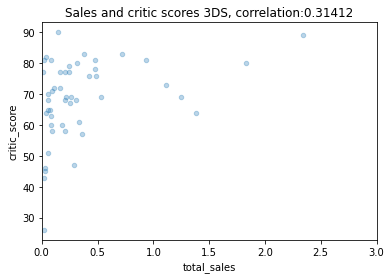

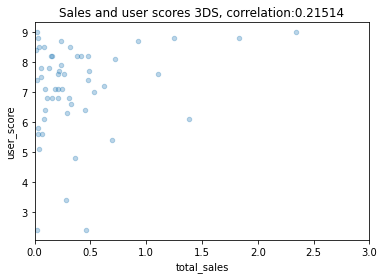

In [ ]:
for i in active_platforms_list:
    
    df_corr_critic = active_platforms[(active_platforms['platform'] == i) &
                           (active_platforms['critic_score'] > 0)]
    corr_critic = df_corr_critic['total_sales'].corr(df_corr_critic['critic_score'])
    
    active_platforms[active_platforms['platform'] == i].plot(x='total_sales'
                                                             , y='critic_score'
                                                             , kind='scatter'
                                                             , alpha=0.3
                                                             , title='Sales and critic scores '+ i + ', correlation:' + str(round(corr_critic,5))
                                                             , xlim = (0,3))
    
    df_corr_user = active_platforms[(active_platforms['platform'] == i) &
                           (active_platforms['user_score'] > 0)] 
    corr_user = df_corr_user['total_sales'].corr(df_corr_user['user_score'])
    
    
    active_platforms[active_platforms['platform'] == i].plot(x='total_sales'
                                                             , y='user_score'
                                                             , kind='scatter'
                                                             , alpha=0.3
                                                             , title='Sales and user scores '+ i + ', correlation:'  + str(round(corr_user,5))
                                                             , xlim = (0,3)) 



#### Brief conclusions on correlation between sales and scores
* Critic ratings have a weak correlation with sales volume, while user ratings generally do not correlate with sales volume. Only on the 3DS and WiiU platforms did users have comparable correlation with critics.
* Critic ratings are more predictive than user ratings. In other words, critics are more likely to determine a successful game in terms of sales than users. This is explained by early critic reviews, on which users base their game purchases.

In [ ]:
# Checking sales by genres on active platforms in 2014-2016
active_platforms.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'median', 'mean']).droplevel(1, axis=1).sort_values(by='median',ascending=False).reset_index()

In [ ]:
# Exploring density of sales below 3 mln
active_platforms = active_platforms.sort_values(by='genre')
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='genre', y='total_sales', data=active_platforms, notch=False)

add_n_obs(active_platforms,group_col='genre',y='total_sales')    

# Decoration
plt.title('Sales by genres on active platforms', fontsize=20)
plt.ylim(0, 4)
plt.show()

#### Conclusion on genres
* Based on the sample of relevant platforms from 2014-2016, Shooters have become the genre with the highest sales per game, undoubtedly being the dominating genre among games;
* Sports games and Platformers with Fighting games follow Shooters. Despite a small number of games and overall sales volume, the latter two genres consistently have high sales for each title;
* Among the genres with high sales variability are Action, Role-Playing, and Adventure. It is likely that developing a successful game in these genres is a very challenging task;
S* trategy, Puzzle, and Simulation games can be classified as unpopular genres, while Misc and Racing are genres in which a large number of games with low sales are released.

When developing a marketing plan for a store, it is necessary to take into account the dominant position of Shooters and the high profitability of Sports, Platformers, Fighting, and Role-Playing games.

# 4. User profile <a class="anchor" id="chapter4"></a>

### 4.1 The most popular platforms by regions <a class="anchor" id="section4_1"></a>

In [ ]:
# Exploring sales by platforms and regions
sales = ['na_sales','eu_sales','jp_sales']
titles = ['Sales in North America','Sales in Europe','Sales in Japan']

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12, 16), subplot_kw=dict(aspect="equal"), dpi= 80)


for n, region_sales in enumerate(sales):
    ax = axes.flatten()[n]
    sales_pm = active_platforms.pivot_table(index='platform', values=region_sales, aggfunc=['sum']).droplevel(1, axis=1).sort_values(by='sum',ascending=False).reset_index()
    sales_pm = sales_pm.head(5)

    data = sales_pm['sum']
    categories = sales_pm['platform']

    ax.pie(data, labels=categories, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(titles[n])
        
        
# Decoration
    ax.legend(sales_pm['platform'].unique(), loc='best')
plt.show()

#### Brief conclusions on platform popularity:
* PS4 is preferred in the North America and Europe regions;
* Xbox (both generations) is most popular in North America, with XOne slightly behind PS4 in this market;
* Xbox is a very unpopular platform in Japan. The overwhelming majority prefer 3DS, followed by Sony platforms.

### 4.2 The most popular genres by regions <a class="anchor" id="section4_2"></a>

In [ ]:
# Exploring sales by genres and regions
sales = ['na_sales','eu_sales','jp_sales']
titles = ['Sales in North America','Sales in Europe','Sales in Japan']

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12, 16), subplot_kw=dict(aspect="equal"), dpi= 80)


for n, region_sales in enumerate(sales):
    ax = axes.flatten()[n]
    sales_pm = active_platforms.pivot_table(index='genre', values=region_sales, aggfunc=['sum']).droplevel(1, axis=1).sort_values(by='sum',ascending=False).reset_index()
    sales_pm = sales_pm.head(5)

    data = sales_pm['sum']
    categories = sales_pm['genre']

    ax.pie(data, labels=categories, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(titles[n])
        
        
# Decoration
    ax.legend(sales_pm['genre'].unique(), loc='best')
plt.show()

#### Brief conclusions on genre popularity:
* Shooter and Action are the most popular genres in North America and Europe. In North America, Shooters are slightly ahead when Action in Europe;
* Sports games and role-playing games are also popular in North America and Europe. In North America, among the top 5 there is also Misc, and Racing in Europe;
* In Japan, role-playing games are first. As in the Europe and North America, Action games are popular there, and Shooters round out the top five. In Japan, among the most popular genres are Fighting games, which are not reflected in the top 5 of other regions.

### 4.3 Influence of ratings on sales <a class="anchor" id="section4_3"></a>

In [ ]:
# Exploring sales by ratings and regions
sales = ['na_sales','eu_sales','jp_sales']
titles = ['Sales in North America','Sales in Europe','Sales in Japan']

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12, 16), subplot_kw=dict(aspect="equal"), dpi= 80)


for n, region_sales in enumerate(sales):
    ax = axes.flatten()[n]
    sales_pm = active_platforms[active_platforms['rating'] != 'undefined'].pivot_table(index='rating', values=region_sales, aggfunc=['sum']).droplevel(1, axis=1).sort_values(by='sum',ascending=False).reset_index()
    sales_pm = sales_pm.head(5)

    data = sales_pm['sum']
    categories = sales_pm['rating']

    ax.pie(data, labels=categories, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(titles[n])
        
        
# Decoration
    ax.legend(sales_pm['rating'].unique(), loc='best')
plt.show()

#### Brief conclusions on ratings:
* Ratings are distributed fairly evenly in the North America and Europe regions, with almost half of the games rated "Mature" and about a quarter rated "Everyone". This is explained by the popularity of action and shooter games in these regions, which often contain violence, as well as the popularity of sports games, which do not have strict age restrictions;
* The picture is different in Japan, where over 40% of sales are accounted for by games rated "Teen", while "Mature" games make up only 22.1%;
* The least popular rating in all 3 regions is "Everyone 10+" games.

# 5. Hypothesis testing <a class="anchor" id="chapter5"></a>

We conduct a check of the means of two populations using the t-test function st.ttest_ind. We set the variable **equal_var** to False due to the different sample sizes.

### Hypothesis 1: Average user scores between Xbox One and PC are equal <a class="anchor" id="section5_1"></a>
```
H_0: User score (user_score) on platform "XOne" = user score (user_score) on platform "PC"
H_a: User score (user_score) on platform "XOne" ≠ user score (user_score) on platform "PC"
alpha = 0.05
```

In [ ]:
user_score_XOne = active_platforms[(active_platforms['platform'] == 'XOne') & (active_platforms['user_score'].isnull() == False)]['user_score']
user_score_PC = active_platforms[(active_platforms['platform'] == 'PC') & (active_platforms['user_score'].isnull() == False)]['user_score']

print('Sample XOne: ', len(user_score_XOne))
print('Sample PC: ', len(user_score_PC))

results = st.ttest_ind(
    user_score_XOne, 
    user_score_PC,
    equal_var=False)

alpha = .05

print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Couldn't reject null hypothesis") 

### Hypothesis 2: Average user scores of genres Action and Sports are equal. <a class="anchor" id="section5_2"></a>
```
H_0: User score (user_score) of genre "Action" = user score (user_score) of genre "Sports"`
H_a: User score (user_score) of genre "Sports" ≠ user score (user_score) of genre "Sports"`
alpha = 0.05
```

In [ ]:
user_score_Action = active_platforms[(active_platforms['genre'] == 'Action') & (active_platforms['user_score'].isnull() == False)]['user_score']
user_score_Sports = active_platforms[(active_platforms['genre'] == 'Sports') & (active_platforms['user_score'].isnull() == False)]['user_score']

print('Sample Action: ', len(user_score_Action))
print('Sample Sports: ', len(user_score_PC))


results = st.ttest_ind(
    user_score_Action, 
    user_score_Sports,
    equal_var=False)

alpha = .05

print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Couldn't reject null hypothesis") 

# 6. Results <a class="anchor" id="chapter6"></a>
* The gaming industry began to significantly develop by the mid-2000s, as evidenced by the increasing sales volume;
* On average, platforms have a lifespan of about 8 years, and among those currently relevant in the dataset are 2 generations of PlayStation and Xbox consoles, Wii, and Nintendo. Based on sales figures by year, it can be seen that a new generation emerged in 2013-2014;
* Game review scores can influence sales volume, possibly due to reviews being published before the release of games. Trust in critics apparently leads to the purchase of games that are later poorly evaluated by players;
* In the current generation, the most popular and profitable genres are Action, Shooter, and Sports;
* There is no significant difference in genre preferences between users in Europe and North America, while in Japan, the role-playing genre stands out. Games in the Action, Shooter, and Role-Playing genres are represented in the top 5 in all 3 regions;
* In North America and Europe, the preferred platform is the PS4, with XBox having a noticeable share in North America. The 3DS platform dominates in Japan, followed by three Sony platforms;
* Users in Europe and North America prefer relatively similar ESRB-rated games, purchasing the majority of games rated "Mature". In Japan, games rated "Teen" are more frequently purchased;
* When testing hypotheses, it was not possible to reject the hypothesis of equal average user ratings for XOne and PC platforms, but a similar hypothesis comparing the Action and Sports genres was rejected.